In [9]:
import pymrio  
import os  
import matplotlib.pyplot as plt  
import numpy as np  
import seaborn as sns  
from pathlib import Path
import plotly.graph_objects as go 

In [29]:
eora_path = 'C:/Users/megan/mz_codes/Eora26_2022_bp'  
eora26 = pymrio.parse_eora26(eora_path, year=2022)  
  
# Replace zeros with mean value  
x_array = np.array(eora26.x)  
if np.any(x_array == 0):  
   mean_value = np.nanmean(x_array[x_array != 0])  
   x_array[x_array == 0] = mean_value  
   eora26.x = x_array  

eora26.calc_all()
eora26.calc_extensions()

C:\Users\megan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pymrio\tools\ioparser.py:1949: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  eora_data[key].drop(row_name, axis=1, inplace=True)
C:\Users\megan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pymrio\tools\ioparser.py:1962: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  eora_data[key].drop(row_name, axis=0, inplace=True)
C:\Users\megan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pymrio\tools\ioparser.py:1949: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  eora_data[key].drop(row_name, axis=1, inplace=True

In [37]:
if eora26.A is None:  
   print("The input-output table is not available.")  
else:  
   regions = eora26.A.index.get_level_values(0).unique()  
   sectors = eora26.A.index.get_level_values(1).unique()  
   io_table = eora26.A  
   fd_table = eora26.Y  
   leontief_inverse = eora26.L  
   print("Done at this step.") 
   print(fd_table)

Done at this step.
region                                                                   AFG  \
category                                    Household final consumption P.3h   
region sector                                                                  
AFG    Agriculture                                              2.099300e+06   
       Fishing                                                  9.096920e+04   
       Mining and Quarrying                                     1.948440e+04   
       Food & Beverages                                         7.815350e+05   
       Textiles and Wearing Apparel                             1.375630e+05   
...                                                                      ...   
ZWE    Public Administration                                    6.858600e+00   
       Education, Health and Other Services                     7.587320e+00   
       Private Households                                       3.844270e+00   
       Others        

In [42]:
broadband_sectors = ['Post and Telecommunications', 'Electrical and Machinery',  'Construction',  'Transport',  'Finacial Intermediation and Business Activities']  
scenario_demand_increase = 0.15  # test: 15% increase  

io_table = eora26.A  
eora_bb = io_table.loc[(slice(None), broadband_sectors), (slice(None), broadband_sectors)]  

y_indices = [fd_table.index.get_loc((region, sector)) for region in fd_table.index.get_level_values(0).unique() for sector in broadband_sectors]  
scenario_1 = fd_table.copy()  
scenario_1.iloc[y_indices] *= (1 + scenario_demand_increase) 



In [50]:
list(eora26.get_extensions())
print(eora26.Q.D_cba)

region                                                                                      AFG  \
sector                                                                              Agriculture   
stressor                         source                                                           
Energy Usage                     Natural Gas                                         264.623275   
                                 Coal                                                159.605227   
                                 Petroleum                                           302.181539   
                                 Nuclear Electricity                                  14.500410   
                                 Hydroelectric Electricity                            14.492587   
...                                                                                         ...   
IEA GHG emissions and energy use IEA - DEPRECATED - GDP using purchasing power p...    0.000000   
          

C:\Users\megan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pymrio\core\mriosystem.py:900: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  Y_agg = Y.groupby(level="region", axis=1, sort=False).sum()
C:\Users\megan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pymrio\core\mriosystem.py:956: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  F_Y_agg = self.F_Y.groupby(level="region", axis=1, sort=False).sum()
C:\Users\megan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pymrio\core\mriosystem.py:900: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  Y_agg = Y.groupby(level="region

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (2,) and arg 1 with shape (2, 4914).

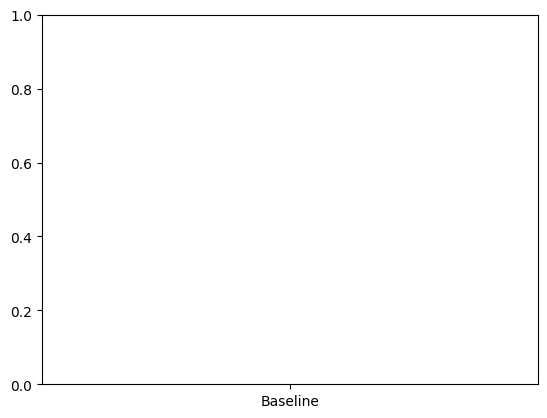

In [51]:
eora26_scenario = eora26.copy()  
eora26_scenario.y = scenario_1  
eora26_scenario.calc_all()  
eora26_scenario.calc_extensions()  
    
baseline_co2 = eora26.Q.D_cba.sum()  
scenario_co2 = eora26_scenario.Q.D_cba.sum()  
  
plt.bar(['Baseline', 'Broadband Expansion Scenario'], [baseline_co2, scenario_co2])  
plt.xlabel('Scenario')  
plt.ylabel('Total CO2 Emissions')  
plt.title('Environmental Impact of Broadband Expansion')  
plt.show()  
   
print("Baseline CO2 Emissions:", baseline_co2)  
print("Scenario CO2 Emissions:", scenario_co2)  
print("Percentage Change in CO2 Emissions:", ((scenario_co2 - baseline_co2) / baseline_co2) * 100, "%")  
  